In [37]:
import requests
import pandas as pd
from io import BytesIO
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# URL do novo arquivo no GitHub
url = "https://raw.githubusercontent.com/adirsonmfjr/credito-rural/main/Dados_Estoque_credito_rural_investimento_1993-2023.xls"

# Baixar o arquivo
response = requests.get(url)

if response.status_code == 200:
    # Carregar o Excel com ajustes
    df = pd.read_excel(
        BytesIO(response.content),
        sheet_name="Séries",  # Nome da aba no Excel
        engine="xlrd",
        dtype=str  # Lê como string para evitar conversões erradas
    )

    # Converter colunas numéricas para float e substituir NaN por 0
    for col in df.columns[3:]:  # Pular as três primeiras colunas (Sigla, Código, Município)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    print("Arquivo carregado com sucesso!")

    # Selecionar os primeiros 15 anos (1993-2008)
    anos_iniciais = [str(ano) for ano in range(1993, 2009)]
    df_inicial = df[["Sigla", "Codigo", "Município"] + anos_iniciais].copy()

    # Exibir as colunas disponíveis no DataFrame no final
    print("\nColunas do DataFrame filtrado:")
    print(list(df_inicial.columns))  # Converte para lista para exibir melhor

    # Exibir as primeiras linhas do DataFrame no formato de tabela
    from IPython.display import display
    display(df_inicial.head(10))  # Usa display() para exibição formatada no notebook

else:
    print("Erro ao baixar o arquivo:", response.status_code)


Arquivo carregado com sucesso!

Colunas do DataFrame filtrado:
['Sigla', 'Codigo', 'Município', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008']


,Sigla,Codigo,Município,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,AC,1200013,Acrelândia,0,0,21749,5083039,1180168,3589282,3948295,8142622,3347012,1541562,2558915,551510,4832695,1921810,2735916,844131
1,AC,1200054,Assis Brasil,105710,1764378,294535,0,0,228538,680651,221440,109290,0,0,49949,781147,117877,313860,136704
2,AC,1200104,Brasiléia,5822953,4867202,2889871,486008,818832,969117,2625706,1785824,3565778,1002995,680181,239910,2588720,1728578,2084454,1665882
3,AC,1200138,Bujari,0,0,569863,13844,0,291207,390341,556976,8349681,6889029,4312354,3599319,5172413,5641186,1453008,1993314
4,AC,1200179,Capixaba,0,0,0,0,104771,558553,0,336127,1834716,1830628,1953815,732710,6724052,1826459,1833713,418647
5,AC,1200203,Cruzeiro do Sul,3909109,8236485,1480887,633675,45919,0,3842023,6018208,619965,1550467,1396530,610961,2916649,320371,963920,932645
6,AC,1200252,Epitaciolândia,0,0,0,0,17272,0,670848,211725,996233,44730,124943,255647,834812,533050,161359,294027
7,AC,1200302,Feijó,0,698382,0,1741801,586188,0,1266467,775192,1909481,569410,244720,314690,1732799,139703,935723,912232
8,AC,1200328,Jordão,0,0,0,0,0,0,0,114865,0,0,0,0,114503,58275,0,0
9,AC,1200336,Mâncio Lima,0,0,0,0,0,0,0,1057553,540955,1910481,76375,0,394262,36092,87158,129633


In [38]:
import requests
import pandas as pd
from io import BytesIO
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# URL do novo arquivo no GitHub
url = "https://raw.githubusercontent.com/adirsonmfjr/credito-rural/main/Dados_Estoque_credito_rural_investimento_1993-2023.xls"

# Baixar o arquivo
response = requests.get(url)

if response.status_code == 200:
    # Carregar o Excel com ajustes
    df = pd.read_excel(
        BytesIO(response.content),
        sheet_name="Séries",  # Nome da aba no Excel
        engine="xlrd",
        dtype=str  # Lê como string para evitar conversões erradas
    )

    # Converter colunas numéricas para float e substituir NaN por 0
    for col in df.columns[3:]:  # Pular as três primeiras colunas (Sigla, Código, Município)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    print("Arquivo carregado com sucesso!")

    # Selecionar os primeiros 15 anos (1993-2008)
    anos_iniciais = [str(ano) for ano in range(1993, 2009)]
    df_inicial = df[["Sigla", "Codigo", "Município"] + anos_iniciais].copy()

    # Identificar as colunas de anos (ignorar as colunas categóricas)
    colunas_anos = [col for col in df_inicial.columns if col.isdigit()]  # Filtra apenas colunas com nome numérico

    # Criar colunas de Data Inicial e Data Final
    df_inicial["Data_Inicial"] = int(min(colunas_anos))  # Primeiro ano disponível na base
    df_inicial["Data_Final"] = int(max(colunas_anos))    # Último ano disponível na base

    # Criar a coluna de Recência (R)
    def calcular_recencia(row):
        anos_validos = [int(ano) for ano in colunas_anos if row[ano] > 0]  # Filtra os anos com estoque maior que 0
        if anos_validos:
            return df_inicial["Data_Final"].iloc[0] - max(anos_validos)  # Último ano de estoque - Data Final
        return df_inicial["Data_Final"].iloc[0] - df_inicial["Data_Inicial"].iloc[0]  # Caso não tenha estoque, pega o período total

    df_inicial["Recencia"] = df_inicial.apply(calcular_recencia, axis=1)

    # Criar a coluna de Frequência (F) - Contagem de anos com estoque positivo
    df_inicial["Frequencia"] = (df_inicial[colunas_anos] > 0).sum(axis=1)

    # Criar a coluna Monetário (M) - Soma total dos estoques ao longo do período
    df_inicial["Monetario"] = df_inicial[colunas_anos].sum(axis=1)

    # Exibir as colunas disponíveis no DataFrame
    print("\nColunas do DataFrame filtrado:")
    print(list(df_inicial.columns))  # Lista as colunas de forma clara

    # Exibir os dados formatados corretamente no Jupyter Notebook
    from IPython.display import display
    display(df_inicial.head())

else:
    print("Erro ao baixar o arquivo:", response.status_code)


Arquivo carregado com sucesso!

Colunas do DataFrame filtrado:
['Sigla', 'Codigo', 'Município', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 'Data_Inicial', 'Data_Final', 'Recencia', 'Frequencia', 'Monetario']


,Sigla,Codigo,Município,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,Data_Inicial,Data_Final,Recencia,Frequencia,Monetario
0,AC,1200013,Acrelândia,0,0,21749,5083039,1180168,3589282,3948295,...,551510,4832695,1921810,2735916,844131,1993,2008,0,14,40298706
1,AC,1200054,Assis Brasil,105710,1764378,294535,0,0,228538,680651,...,49949,781147,117877,313860,136704,1993,2008,0,12,4804079
2,AC,1200104,Brasiléia,5822953,4867202,2889871,486008,818832,969117,2625706,...,239910,2588720,1728578,2084454,1665882,1993,2008,0,16,33822011
3,AC,1200138,Bujari,0,0,569863,13844,0,291207,390341,...,3599319,5172413,5641186,1453008,1993314,1993,2008,0,13,39232535
4,AC,1200179,Capixaba,0,0,0,0,104771,558553,0,...,732710,6724052,1826459,1833713,418647,1993,2008,0,11,18154191


In [39]:
import pandas as pd

# Criar uma cópia do dataframe filtrado para os cálculos LFM
rfm = df_inicial.copy()

# Criar a coluna de Longevidade (L) como o intervalo entre o primeiro e o último ano com crédito
def calcular_longevidade(row):
    anos_validos = [int(ano) for ano in colunas_anos if row[ano] > 0]  # Anos em que o município pegou crédito
    if anos_validos:
        return max(anos_validos) - min(anos_validos)  # Último ano - Primeiro ano
    return 0  # Caso nunca tenha pego crédito

rfm["Longevidade"] = rfm.apply(calcular_longevidade, axis=1)

# Criar scores LFM por quintis (de 1 a 5)
rfm["score_L"] = pd.qcut(rfm["Longevidade"], 5, labels=False, duplicates="drop") + 1
rfm["score_R"] = pd.qcut(-rfm["Recencia"], 5, labels=False, duplicates="drop") + 1  # Mantendo score_R original
rfm["score_F"] = pd.qcut(rfm["Frequencia"], 5, labels=False, duplicates="drop") + 1
rfm["score_M"] = pd.qcut(rfm["Monetario"], 5, labels=False, duplicates="drop") + 1

# Criar um score médio entre Frequência e Monetário
rfm["score_FM"] = (rfm["score_F"] + rfm["score_M"]) / 2

# Converter score_FM para inteiro
rfm["score_FM"] = rfm["score_FM"].astype(int)

# Reordenar as colunas conforme a necessidade
colunas_finais = ["Município", "Data_Inicial", "Data_Final", "Longevidade", "Recencia", "Frequencia", "Monetario", "score_L", "score_R", "score_F", "score_M", "score_FM"]
rfm = rfm[["Município"] + colunas_finais]

# Exportar o arquivo para Excel
rfm.to_excel("segmentacao_LFM_credito_rural.xlsx", index=False, engine="openpyxl")

# Exibir os dados segmentados
from IPython.display import display
display(rfm.head(30))


,Município,Município,Data_Inicial,Data_Final,Longevidade,Recencia,Frequencia,Monetario,score_L,score_R,score_F,score_M,score_FM
0,Acrelândia,Acrelândia,1993,2008,13,0,14,40298706,2,1,2,5,3
1,Assis Brasil,Assis Brasil,1993,2008,15,0,12,4804079,2,1,2,2,2
2,Brasiléia,Brasiléia,1993,2008,15,0,16,33822011,2,1,4,4,4
3,Bujari,Bujari,1993,2008,13,0,13,39232535,2,1,2,5,3
4,Capixaba,Capixaba,1993,2008,11,0,11,18154191,1,1,1,4,2
5,Cruzeiro do Sul,Cruzeiro do Sul,1993,2008,15,0,15,33477814,2,1,3,4,3
6,Epitaciolândia,Epitaciolândia,1993,2008,11,0,11,4144646,1,1,1,2,1
7,Feijó,Feijó,1993,2008,14,0,13,11826788,2,1,2,3,2
8,Jordão,Jordão,1993,2008,6,2,3,287643,1,1,1,1,1
9,Mâncio Lima,Mâncio Lima,1993,2008,8,0,8,4232509,1,1,1,2,1


In [40]:
print(rfm.columns)

Index(['Município', 'Município', 'Data_Inicial', 'Data_Final', 'Longevidade',
       'Recencia', 'Frequencia', 'Monetario', 'score_L', 'score_R', 'score_F',
       'score_M', 'score_FM'],
      dtype='object')


In [41]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display

# Criar uma cópia do dataframe filtrado para os cálculos LFM
rfm = df_inicial.copy()

# Garantir que a coluna "Município" esteja presente
if "Município" not in rfm.columns:
    raise KeyError("A coluna 'Município' não está no DataFrame. Verifique os dados.")

# Criar a coluna de Longevidade (L) como o intervalo entre o primeiro e o último ano com crédito
def calcular_longevidade(row):
    anos_validos = [int(ano) for ano in colunas_anos if row[ano] > 0]  # Anos em que o município pegou crédito
    if anos_validos:
        return max(anos_validos) - min(anos_validos)  # Último ano - Primeiro ano
    return 0  # Caso nunca tenha pego crédito

rfm["Longevidade"] = rfm.apply(calcular_longevidade, axis=1)

# Criar scores LFM por quintis (de 1 a 5)
rfm["score_L"] = pd.qcut(rfm["Longevidade"], 5, labels=False, duplicates="drop") + 1
rfm["score_R"] = pd.qcut(-rfm["Recencia"], 5, labels=False, duplicates="drop") + 1
rfm["score_F"] = pd.qcut(rfm["Frequencia"], 5, labels=False, duplicates="drop") + 1
rfm["score_M"] = pd.qcut(rfm["Monetario"], 5, labels=False, duplicates="drop") + 1

# Criar um score médio entre Frequência e Monetário
rfm["score_FM"] = (rfm["score_F"] + rfm["score_M"]) / 2

# Converter score_FM para inteiro
rfm["score_FM"] = rfm["score_FM"].astype(int)

# Normalizar os dados antes do PCA
scaler = StandardScaler()
df_scaled_pca = scaler.fit_transform(rfm[["Frequencia", "Monetario", "Longevidade"]])

# Aplicar PCA para redução de dimensionalidade
pca = PCA()
pca_result = pca.fit_transform(df_scaled_pca)

# Criar a coluna de ranking LFM com base no primeiro componente principal (PCA)
rfm["ranking_LFM"] = np.argsort(-pca_result[:, 0])

# Aplicar K-Means com **6 clusters** (anteriormente eram 7)
kmeans = KMeans(n_clusters=6, n_init=25, random_state=123)
rfm["cluster"] = kmeans.fit_predict(df_scaled_pca)

# Criar um escore composto para segmentação
rfm["score_composto"] = (rfm["score_L"] * 1.5) + (rfm["score_F"] * 1.2) + (rfm["score_M"] * 1.0)

# Definir faixas dinâmicas com base na distribuição real dos dados
p_composto = np.percentile(rfm["score_composto"], [20, 40, 60, 80])

# Criar novas condições de classificação
condicoes = [
    (rfm["score_composto"] > p_composto[3]),  # Alta Intensidade
    (rfm["score_composto"] > p_composto[2]),  # Média-Alta Intensidade
    (rfm["score_composto"] > p_composto[1]),  # Média Intensidade
    (rfm["score_composto"] > p_composto[0]),  # Média-Baixa Intensidade
    (rfm["cluster"] == 4) | (rfm["cluster"] == 5),  # Baixa Intensidade (Junção de 2 grupos)
]

categorias = [
    "Demanda de Alta Intensidade",
    "Demanda de Média-Alta Intensidade",
    "Demanda de Média Intensidade",
    "Demanda de Média-Baixa Intensidade",
    "Demanda de Baixa Intensidade"
]

rfm["classificacao_LFM"] = np.select(condicoes, categorias, default="Inativo")

# Reordenar as colunas para garantir estruturação correta
colunas_finais = ["Município", "Data_Inicial", "Data_Final", "Longevidade", "Recencia", "Frequencia", "Monetario",
                  "score_L", "score_R", "score_F", "score_M", "score_FM", "ranking_LFM", "cluster",
                  "score_composto", "classificacao_LFM"]

# Filtrar somente as colunas finais que realmente existem no DataFrame
colunas_finais = [col for col in colunas_finais if col in rfm.columns]

rfm = rfm[colunas_finais]

# Exibir os dados segmentados removendo colunas duplicadas (caso existam)
rfm = rfm.loc[:, ~rfm.columns.duplicated()].copy()

# Exibir os dados segmentados
display(rfm.head(30))


,Município,Data_Inicial,Data_Final,Longevidade,Recencia,Frequencia,Monetario,score_L,score_R,score_F,score_M,score_FM,ranking_LFM,cluster,score_composto,classificacao_LFM
0,Acrelândia,1993,2008,13,0,14,40298706,2,1,2,5,3,1089,0,10.4,Demanda de Média Intensidade
1,Assis Brasil,1993,2008,15,0,12,4804079,2,1,2,2,2,2372,1,7.4,Demanda de Média-Baixa Intensidade
2,Brasiléia,1993,2008,15,0,16,33822011,2,1,4,4,4,2412,0,11.8,Demanda de Média-Alta Intensidade
3,Bujari,1993,2008,13,0,13,39232535,2,1,2,5,3,553,1,10.4,Demanda de Média Intensidade
4,Capixaba,1993,2008,11,0,11,18154191,1,1,1,4,2,2308,1,6.7,Demanda de Média-Baixa Intensidade
5,Cruzeiro do Sul,1993,2008,15,0,15,33477814,2,1,3,4,3,811,0,10.6,Demanda de Média Intensidade
6,Epitaciolândia,1993,2008,11,0,11,4144646,1,1,1,2,1,4184,1,4.7,Inativo
7,Feijó,1993,2008,14,0,13,11826788,2,1,2,3,2,1019,1,8.4,Demanda de Média Intensidade
8,Jordão,1993,2008,6,2,3,287643,1,1,1,1,1,2349,2,3.7,Inativo
9,Mâncio Lima,1993,2008,8,0,8,4232509,1,1,1,2,1,2364,3,4.7,Inativo


Quantidade de municípios por segmento:
classificacao_LFM
Demanda de Média Intensidade          1322
Inativo                               1145
Demanda de Média-Baixa Intensidade    1101
Demanda de Média-Alta Intensidade     1060
Demanda de Alta Intensidade            968
Name: count, dtype: int64
Crédito total concedido por segmento (%):
classificacao_LFM
Demanda de Alta Intensidade          63.003
Demanda de Média Intensidade         13.442
Demanda de Média-Alta Intensidade    16.380
Demanda de Média-Baixa Intensidade    5.523
Inativo                               1.652


<ipython-input-42-4e689676b500>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


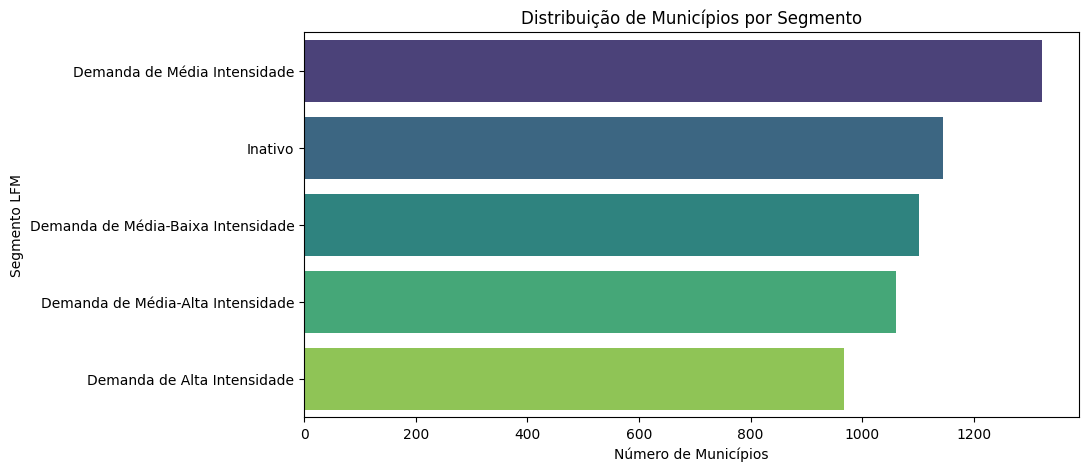

<ipython-input-42-4e689676b500>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_filtrado, x="classificacao_LFM", y="Recencia", palette="viridis", ax=axes[0])
<ipython-input-42-4e689676b500>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-42-4e689676b500>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm_filtrado, x="classificacao_LFM", y="Frequencia", palette="viridis", ax=axes[1])
<ipython-input-42-4e689676b500>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

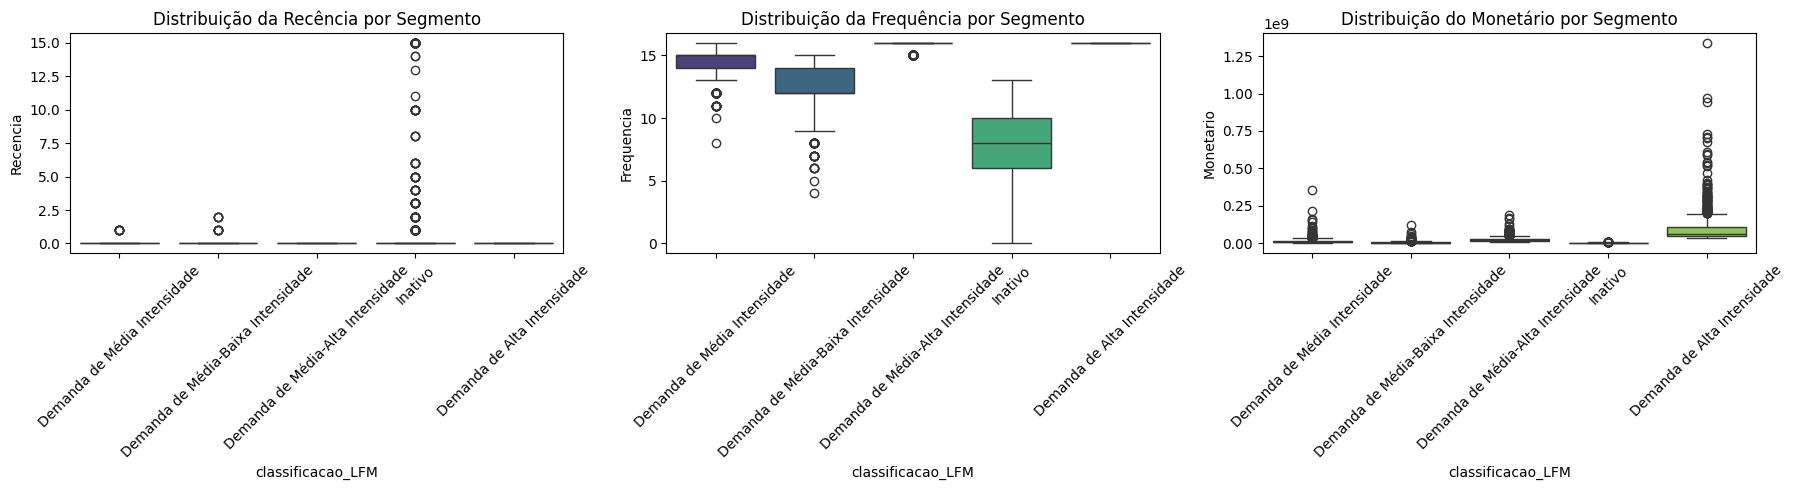

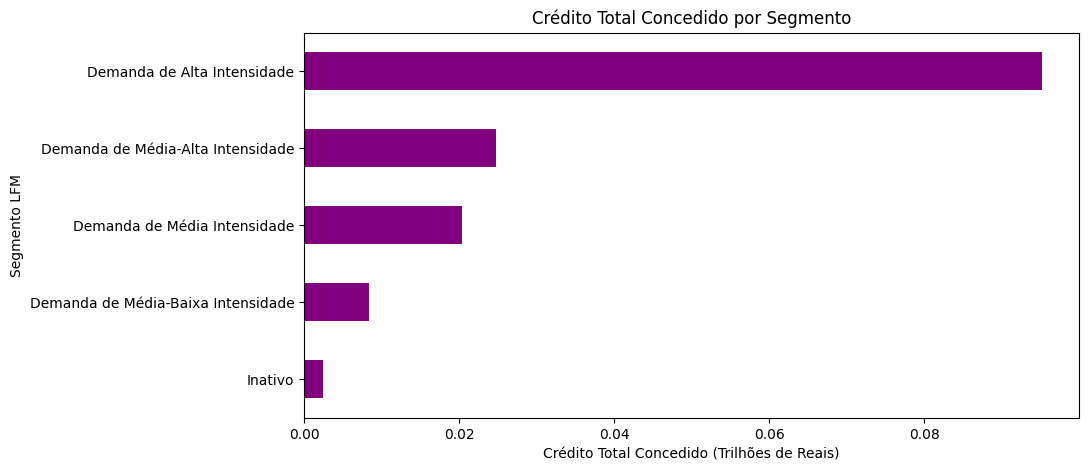

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar dados removendo "Outros Municípios" para uma análise mais relevante
rfm_filtrado = rfm[rfm["classificacao_LFM"] != "Outros Municípios"]

# Contagem dos municípios por segmento
contagem_segmentos = rfm_filtrado["classificacao_LFM"].value_counts()
print("Quantidade de municípios por segmento:")
print(contagem_segmentos)

# Cálculo do crédito total concedido por segmento em porcentagem com três casas decimais
total_credito = rfm_filtrado["Monetario"].sum()
credito_por_segmento = (rfm_filtrado.groupby("classificacao_LFM")["Monetario"].sum() / total_credito) * 100

# Arredondar para três casas decimais e formatar a exibição
credito_por_segmento = credito_por_segmento.round(3)
print("Crédito total concedido por segmento (%):")
print(credito_por_segmento.to_string(float_format="%.3f"))

# 1️⃣ Gráfico de Barras - Quantidade de Municípios por Segmento
plt.figure(figsize=(10, 5))
sns.countplot(
    y=rfm_filtrado["classificacao_LFM"],
    order=rfm_filtrado["classificacao_LFM"].value_counts().index,
    palette="viridis"
)
plt.xlabel("Número de Municípios")
plt.ylabel("Segmento LFM")
plt.title("Distribuição de Municípios por Segmento")
plt.show()

# 2️⃣ Boxplot - Comparação de Recência, Frequência e Monetário por Segmento
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=rfm_filtrado, x="classificacao_LFM", y="Recencia", palette="viridis", ax=axes[0])
axes[0].set_title("Distribuição da Recência por Segmento")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(data=rfm_filtrado, x="classificacao_LFM", y="Frequencia", palette="viridis", ax=axes[1])
axes[1].set_title("Distribuição da Frequência por Segmento")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.boxplot(data=rfm_filtrado, x="classificacao_LFM", y="Monetario", palette="viridis", ax=axes[2])
axes[2].set_title("Distribuição do Monetário por Segmento")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# 3️⃣ Crédito Total Concedido por Segmento (Monetário Total)
plt.figure(figsize=(10, 5))
(rfm_filtrado.groupby("classificacao_LFM")["Monetario"].sum() / 1e12).sort_values().plot(kind="barh", color="purple")
plt.xlabel("Crédito Total Concedido (Trilhões de Reais)")
plt.ylabel("Segmento LFM")
plt.title("Crédito Total Concedido por Segmento")
plt.show()


In [43]:
rfm.head()

,Município,Data_Inicial,Data_Final,Longevidade,Recencia,Frequencia,Monetario,score_L,score_R,score_F,score_M,score_FM,ranking_LFM,cluster,score_composto,classificacao_LFM
0,Acrelândia,1993,2008,13,0,14,40298706,2,1,2,5,3,1089,0,10.4,Demanda de Média Intensidade
1,Assis Brasil,1993,2008,15,0,12,4804079,2,1,2,2,2,2372,1,7.4,Demanda de Média-Baixa Intensidade
2,Brasiléia,1993,2008,15,0,16,33822011,2,1,4,4,4,2412,0,11.8,Demanda de Média-Alta Intensidade
3,Bujari,1993,2008,13,0,13,39232535,2,1,2,5,3,553,1,10.4,Demanda de Média Intensidade
4,Capixaba,1993,2008,11,0,11,18154191,1,1,1,4,2,2308,1,6.7,Demanda de Média-Baixa Intensidade


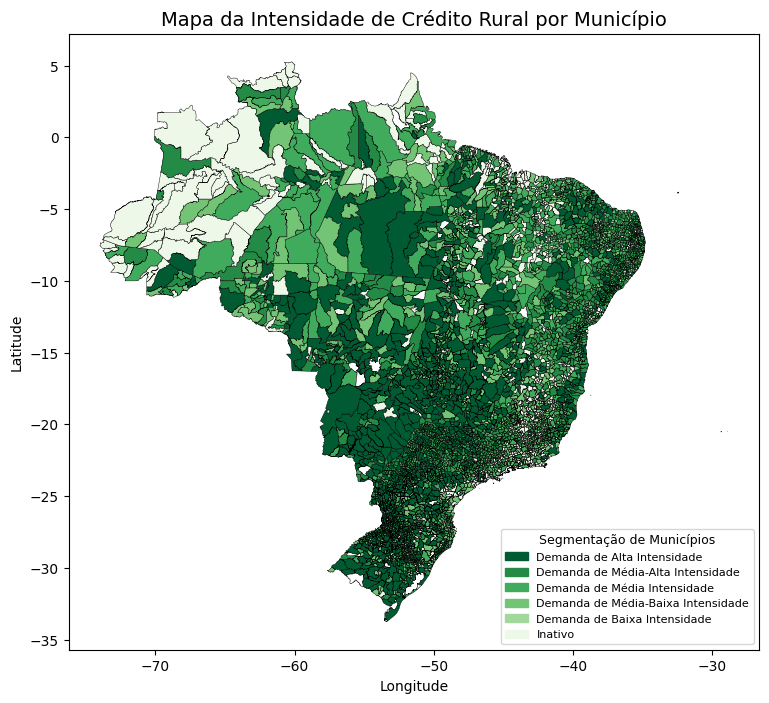

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.patches as mpatches

# Caminho do shapefile (mantenha o diretório correto)
shapefile_path = "BR_Municipios_2023.shp"  # Ajuste conforme o local do arquivo

# Verificar se o arquivo existe no diretório
if not os.path.exists(shapefile_path):
    raise FileNotFoundError(f"O arquivo {shapefile_path} não foi encontrado. Verifique o caminho.")

# Carregar o shapefile
brasil = gpd.read_file(shapefile_path)

# Criar um DataFrame apenas com os municípios e sua classificação segmentada
rfm_mapa = rfm[["Município", "classificacao_LFM"]].copy()

# Normalizar os nomes dos municípios para garantir a fusão correta
target_column = "NM_MUN"  # Certifique-se de que esse é o nome correto da coluna de municípios no shapefile
rfm_mapa["Município"] = rfm_mapa["Município"].str.lower()
brasil[target_column] = brasil[target_column].str.lower()

# Juntar os dados ao shapefile do Brasil
brasil = brasil.merge(rfm_mapa, left_on=target_column, right_on="Município", how="left")

# Criar a paleta de cores ajustada para **6 categorias + Inativo**
segmento_cores = {
    "Demanda de Alta Intensidade": "#005a32",
    "Demanda de Média-Alta Intensidade": "#238b45",
    "Demanda de Média Intensidade": "#41ab5d",
    "Demanda de Média-Baixa Intensidade": "#74c476",
    "Demanda de Baixa Intensidade": "#a1d99b",
    "Inativo": "#edf8e9"  # Municípios sem atividade
}

# Aplicar cores ao DataFrame
brasil["cor_segmento"] = brasil["classificacao_LFM"].map(segmento_cores)
brasil["cor_segmento"] = brasil["cor_segmento"].fillna("#FFFFFF")  # Municípios não encontrados ficam brancos

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar o mapa
brasil.plot(ax=ax, color=brasil["cor_segmento"], edgecolor="black", linewidth=0.3)

# Configurar título e legenda
plt.title("Mapa da Intensidade de Crédito Rural por Município", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Criar a legenda manualmente
legenda_patches = [mpatches.Patch(color=cor, label=segmento) for segmento, cor in segmento_cores.items()]
plt.legend(
    handles=legenda_patches,
    title="Segmentação de Municípios",
    loc="lower right",
    fontsize=8,
    title_fontsize=9,
    frameon=True
)

# Exibir o mapa
plt.show()


Valores ausentes na coluna de cor:
Empty GeoDataFrame
Columns: [CD_MUN, NM_MUN, CD_RGI, NM_RGI, CD_RGINT, NM_RGINT, CD_UF, NM_UF, CD_REGIAO, NM_REGIAO, CD_CONCURB, NM_CONCURB, AREA_KM2, geometry, Municipio, classificacao_LFM, cor_segmento]
Index: []


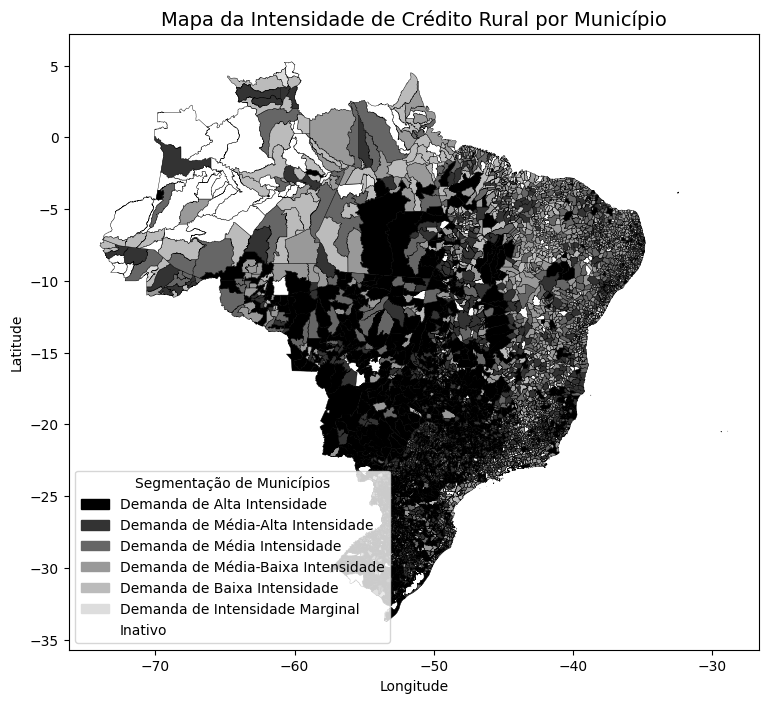

In [ ]:
# Criar a coluna de cores com base na classificação e substituir NaN por branco
brasil["cor_segmento"] = brasil["classificacao_LFM"].map(segmento_cores)
brasil["cor_segmento"] = brasil["cor_segmento"].fillna("#FFFFFF")  # Substitui NaN por branco

# Verificar se ainda há valores NaN
print("Valores ausentes na coluna de cor:")
print(brasil[brasil["cor_segmento"].isna()])

# Criar o mapa
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar os municípios com cores de acordo com a classificação
brasil.plot(ax=ax, color=brasil["cor_segmento"], edgecolor="black", linewidth=0.3)

# Configurar título e legenda
plt.title("Mapa da Intensidade de Crédito Rural por Município", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Criar a legenda manualmente
import matplotlib.patches as mpatches

legenda_patches = [mpatches.Patch(color=cor, label=segmento) for segmento, cor in segmento_cores.items()]
plt.legend(handles=legenda_patches, title="Segmentação de Municípios", loc="lower left", fontsize=10)

# Exibir o mapa
plt.show()


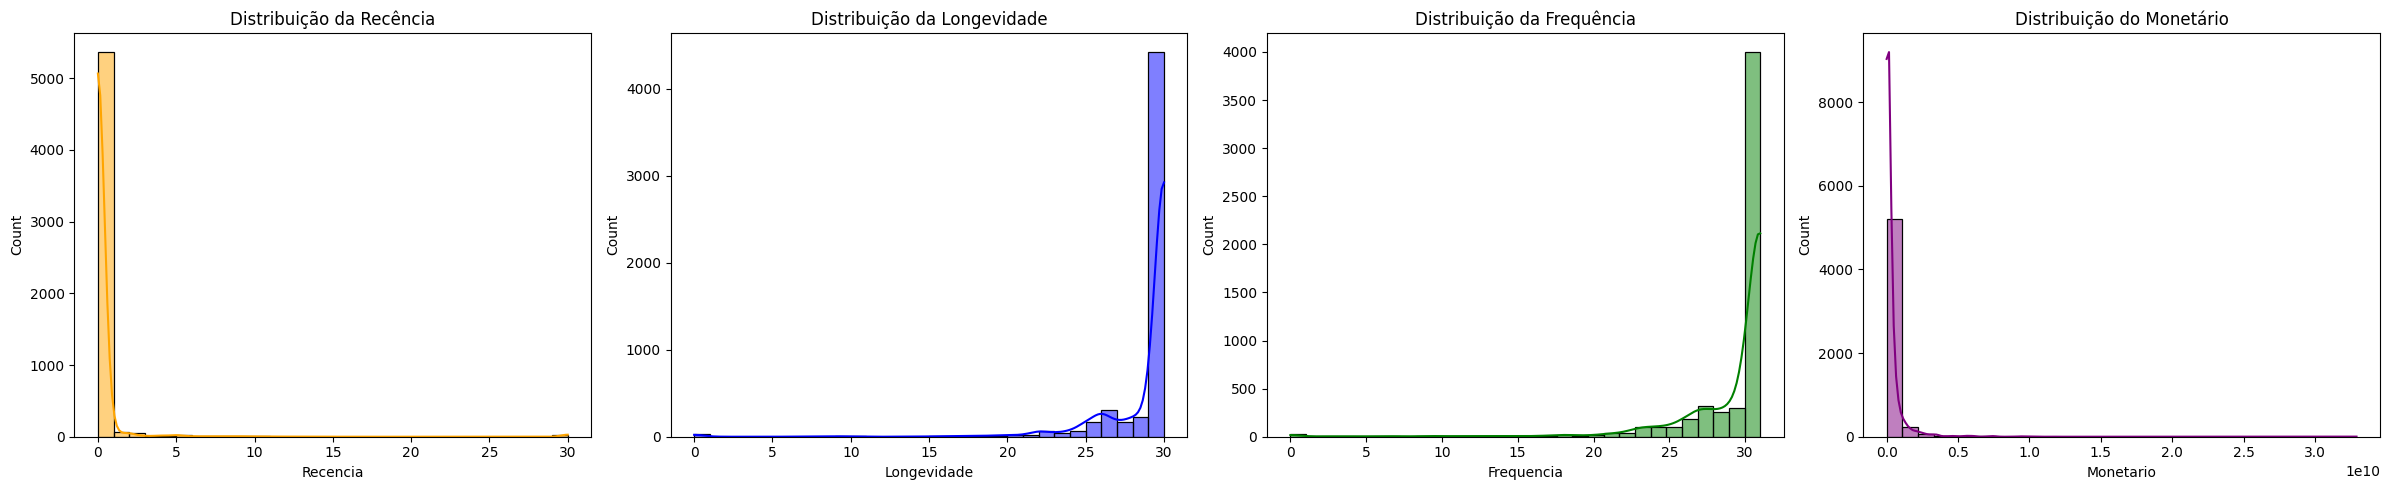

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando subplots para Recência, Longevidade, Frequência e Monetário no modelo LRFM
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

sns.histplot(rfm["Recencia"], bins=30, kde=True, ax=axes[0], color="orange")
axes[0].set_title("Distribuição da Recência")

sns.histplot(rfm["Longevidade"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Distribuição da Longevidade")

sns.histplot(rfm["Frequencia"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Distribuição da Frequência")

sns.histplot(rfm["Monetario"], bins=30, kde=True, ax=axes[3], color="purple")
axes[3].set_title("Distribuição do Monetário")

plt.tight_layout()
plt.show()


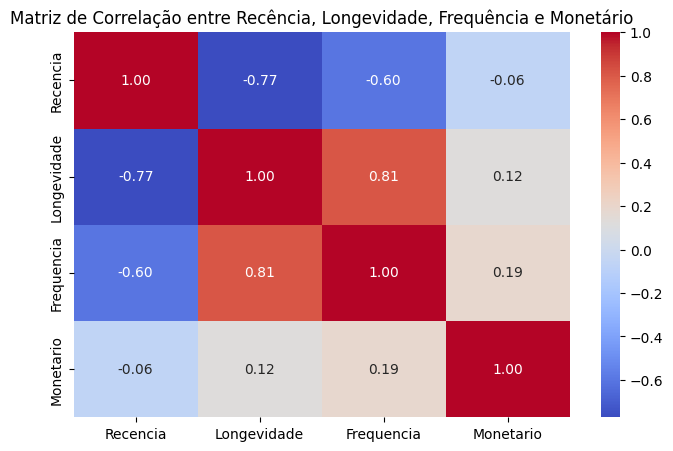

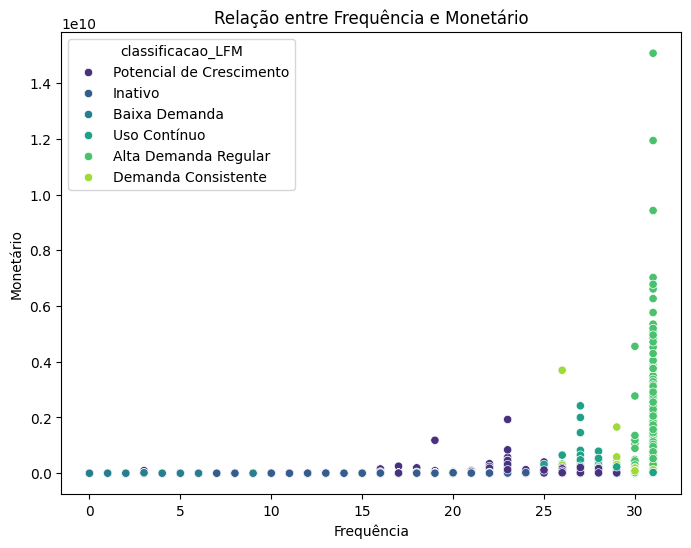

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔥 1️⃣ Matriz de Correlação com Recência, Longevidade, Frequência e Monetário
plt.figure(figsize=(8, 5))
sns.heatmap(
    rfm[["Recencia", "Longevidade", "Frequencia", "Monetario"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Matriz de Correlação entre Recência, Longevidade, Frequência e Monetário")
plt.show()

# 🔥 2️⃣ Scatterplot entre Frequência e Monetário, agora considerando LRFM
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm, x="Frequencia", y="Monetario", hue="classificacao_LFM", palette="viridis"
)
plt.title("Relação entre Frequência e Monetário")
plt.xlabel("Frequência")
plt.ylabel("Monetário")
plt.show()


<ipython-input-8-4f7a42501c6b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfm, x="classificacao_LFM", y="Recencia", palette="viridis", ax=axes[0])
<ipython-input-8-4f7a42501c6b>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-8-4f7a42501c6b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rfm, x="classificacao_LFM", y="Longevidade", palette="viridis", ax=axes[1])
<ipython-input-8-4f7a42501c6b>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

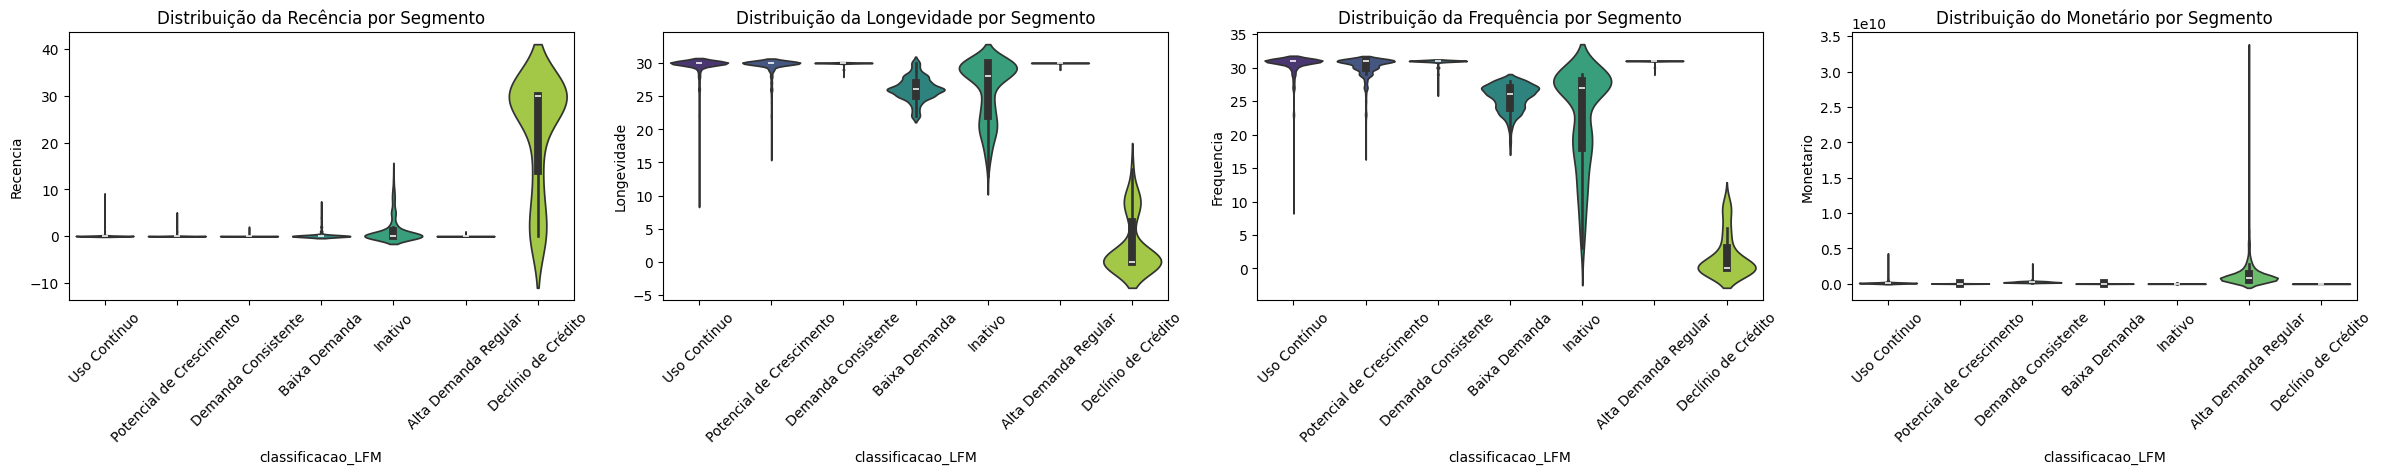

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando subplots para visualizar a distribuição das métricas por segmento LRFM
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

sns.violinplot(data=rfm, x="classificacao_LFM", y="Recencia", palette="viridis", ax=axes[0])
axes[0].set_title("Distribuição da Recência por Segmento")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.violinplot(data=rfm, x="classificacao_LFM", y="Longevidade", palette="viridis", ax=axes[1])
axes[1].set_title("Distribuição da Longevidade por Segmento")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.violinplot(data=rfm, x="classificacao_LFM", y="Frequencia", palette="viridis", ax=axes[2])
axes[2].set_title("Distribuição da Frequência por Segmento")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

sns.violinplot(data=rfm, x="classificacao_LFM", y="Monetario", palette="viridis", ax=axes[3])
axes[3].set_title("Distribuição do Monetário por Segmento")
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


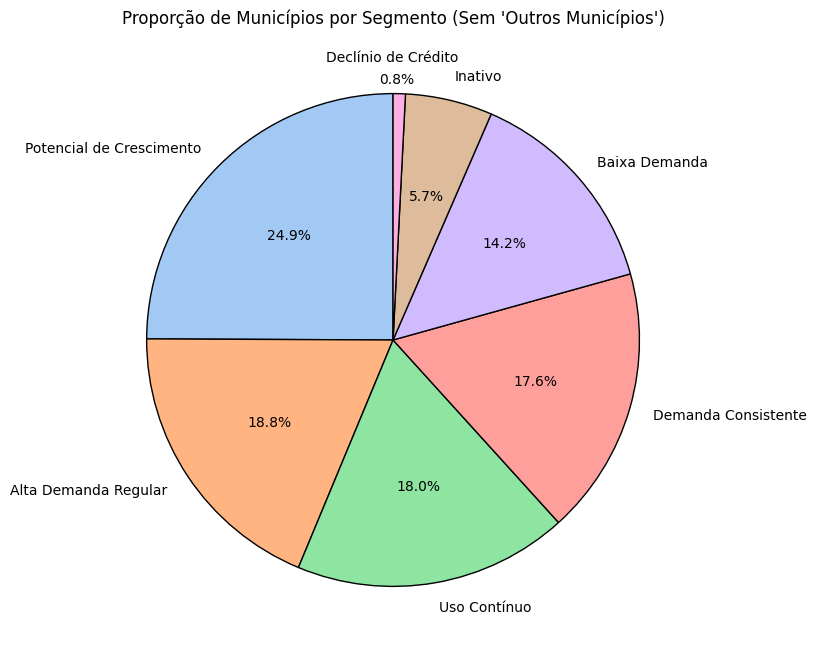

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar dados removendo "Outros Municípios" para uma análise mais relevante
rfm_filtrado = rfm[rfm["classificacao_LFM"] != "Outros Municípios"]

# Contagem dos segmentos para plotagem
segment_counts = rfm_filtrado["classificacao_LFM"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Ajustar manualmente a posição do rótulo e porcentagem de "Declínio de Crédito"
for i, text in enumerate(texts):
    if text.get_text() == "Declínio de Crédito":
        text.set_y(text.get_position()[1] + 0.05)  # Mantém o rótulo um pouco acima
        text.set_x(text.get_position()[0] - 0.3)  # Move o rótulo um pouco para a esquerda
        percent_text = autotexts[i]

        # Move a porcentagem exatamente para cima da fatia rosa
        percent_text.set_y(text.get_position()[1] - 0.09)

# Título do gráfico
plt.title("Proporção de Municípios por Segmento (Sem 'Outros Municípios')")
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.show()


In [ ]:
from scipy.stats import f_oneway, levene
import pandas as pd

# Definir variáveis para análise estatística no modelo LFM
variaveis = ["Recencia", "Longevidade", "Frequencia", "Monetario"]

# Criar dicionários para armazenar os resultados
resultados_anova = {}
resultados_levene = {}

# Calcular ANOVA e Teste de Levene para cada variável considerando os clusters
for var in variaveis:
    grupos = [rfm[var][rfm["cluster"] == i] for i in rfm["cluster"].unique()]
    resultados_anova[var] = f_oneway(*grupos)
    resultados_levene[var] = levene(*grupos)

# Criar DataFrame com os resultados
resultados_df = pd.DataFrame({
    "ANOVA_F": [resultados_anova[var].statistic for var in variaveis],
    "ANOVA_p": [resultados_anova[var].pvalue for var in variaveis],
    "Levene_F": [resultados_levene[var].statistic for var in variaveis],
    "Levene_p": [resultados_levene[var].pvalue for var in variaveis]
}, index=variaveis)

# Ajustar a exibição dos valores em notação científica forçada
pd.set_option("display.float_format", lambda x: f"{x:.5e}")  # Exibir 50 casas decimais em notação científica

# Exibir resultados
print("Resultados dos Testes ANOVA e Levene (Com Precisão Extrema para p-value):")
print(resultados_df)


Resultados dos Testes ANOVA e Levene (Com Precisão Extrema para p-value):
                ANOVA_F     ANOVA_p    Levene_F    Levene_p
Recencia    2.35024e+03 0.00000e+00 4.32768e+02 0.00000e+00
Longevidade 7.55681e+03 0.00000e+00 5.47090e+02 0.00000e+00
Frequencia  6.90491e+03 0.00000e+00 4.14010e+02 0.00000e+00
Monetario   5.66632e+03 0.00000e+00 4.35052e+02 0.00000e+00


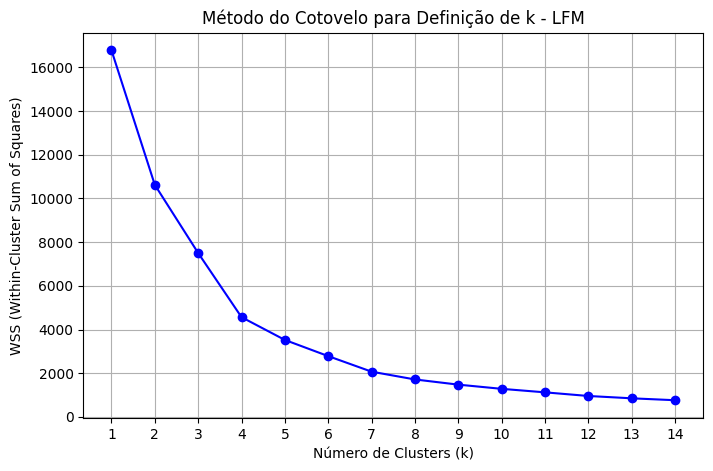

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as variáveis LFM para análise
X = rfm[["Longevidade", "Frequencia", "Monetario"]]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular WSS para diferentes números de clusters
wss = []
k_values = range(1, 15)  # Testar de 1 a 15 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)  # Soma dos quadrados intra-clusters

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss, marker='o', linestyle='-', color='b')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WSS (Within-Cluster Sum of Squares)")
plt.title("Método do Cotovelo para Definição de k - LFM")
plt.xticks(k_values)
plt.grid()
plt.show()
